In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#Importing the neccessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
#Unzipping the dataset file.

In [ ]:
!unzip "/content/drive/My Drive/Colab/Kagglecatsanddogs/kagglecatsanddogs_3367a.zip" -d"/content/drive/My Drive/Colab/Kagglecatsanddogs"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5501.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5502.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5503.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5504.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5505.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5506.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5507.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5508.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5509.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/551.jpg  
  inflating: /content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages/Dog/5510.jpg  
  in

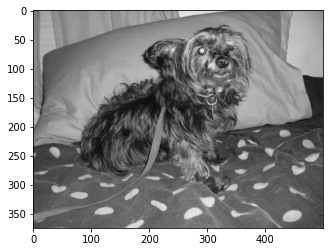

In [ ]:
DATADIR="/content/drive/My Drive/Colab/Kagglecatsanddogs/PetImages" 
CATEGORIES=["Dog","Cat"]

for category in CATEGORIES:
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break
#Use convnet to work using colored images instead of greyscale ones.

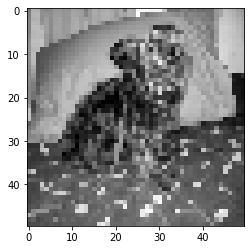

In [ ]:
IMG_SIZE=50 #Resizing all the images to 50*50.Can be more or less pixalated(30*30,80*80 or anything else.)
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

1
1
0
1
1
0
1
0
1
0


In [ ]:
X=[]
y=[]
for features,label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)# Here 1 is the channel value.Channel value for colored images is 3.

In [ ]:
import pickle #For saving the data so that we don't have to run the entire code everytime.
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
#Here the data is saved in pickle format.
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#Now using ConvNet for Image Prediction.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle

In [ ]:
X=pickle.load(open('X.pickle','rb'))
y=pickle.load(open('y.pickle','rb'))
X=np.array(X/255.0)#Converting the integer lists into numpy arrays.
y=np.array(y)

In [ ]:
model=Sequential()

model.add( Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
702/702 [==============================] - 104s 148ms/step - loss: 0.6313 - accuracy: 0.6406 - val_loss: 0.5599 - val_accuracy: 0.7162
Epoch 2/10
702/702 [==============================] - 104s 148ms/step - loss: 0.5313 - accuracy: 0.7368 - val_loss: 0.5125 - val_accuracy: 0.7571
Epoch 3/10
702/702 [==============================] - 104s 148ms/step - loss: 0.4904 - accuracy: 0.7641 - val_loss: 0.4845 - val_accuracy: 0.7675
Epoch 4/10
702/702 [==============================] - 104s 148ms/step - loss: 0.4632 - accuracy: 0.7824 - val_loss: 0.4922 - val_accuracy: 0.7719
Epoch 5/10
702/702 [==============================] - 103s 147ms/step - loss: 0.4377 - accuracy: 0.7964 - val_loss: 0.4830 - val_accuracy: 0.7836
Epoch 6/10
702/702 [==============================] - 104s 148ms/step - loss: 0.4130 - accuracy: 0.8103 - val_loss: 0.4486 - val_accuracy: 0.7912
Epoch 7/10
702/702 [==============================] - 104s 149ms/step - loss: 0.3864 - accuracy: 0.8274 - val_loss: 0.4693 -